In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r'ObesityDataSet_raw_and_data_sinthetic.csv')

# EDA

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data = data.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [5]:
data.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
data.shape

(2111, 17)

In [7]:
data.dtypes

Gender     object
Age       float64
Height    float64
Weight    float64
FHWO       object
FAVC       object
FCVC      float64
NCP       float64
CAEC       object
SMOKE      object
CH2O      float64
SCC        object
FAF       float64
TUE       float64
CALC       object
MTRANS     object
BMI        object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [9]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
col = data.columns
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [11]:
data.isnull().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

# Unique Value Atribute

In [12]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
good_label_cols.remove('BMI')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [13]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 yes    1726
no      385
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight   

In [14]:
col_isna = data.isnull().sum().to_list()
for count, i in enumerate(col_isna):
    print(count, '{:15}'.format(col[count]), i)

0 Gender          0
1 Age             0
2 Height          0
3 Weight          0
4 FHWO            0
5 FAVC            0
6 FCVC            0
7 NCP             0
8 CAEC            0
9 SMOKE           0
10 CH2O            0
11 SCC             0
12 FAF             0
13 TUE             0
14 CALC            0
15 MTRANS          0
16 BMI             0


# Transformation

In [15]:
data_transform = data.copy()
ordinal_encoder = OrdinalEncoder()
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

In [16]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_transform.replace(dic_to_replace, inplace=True)

In [17]:
data_transform

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


In [18]:
data_transform.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


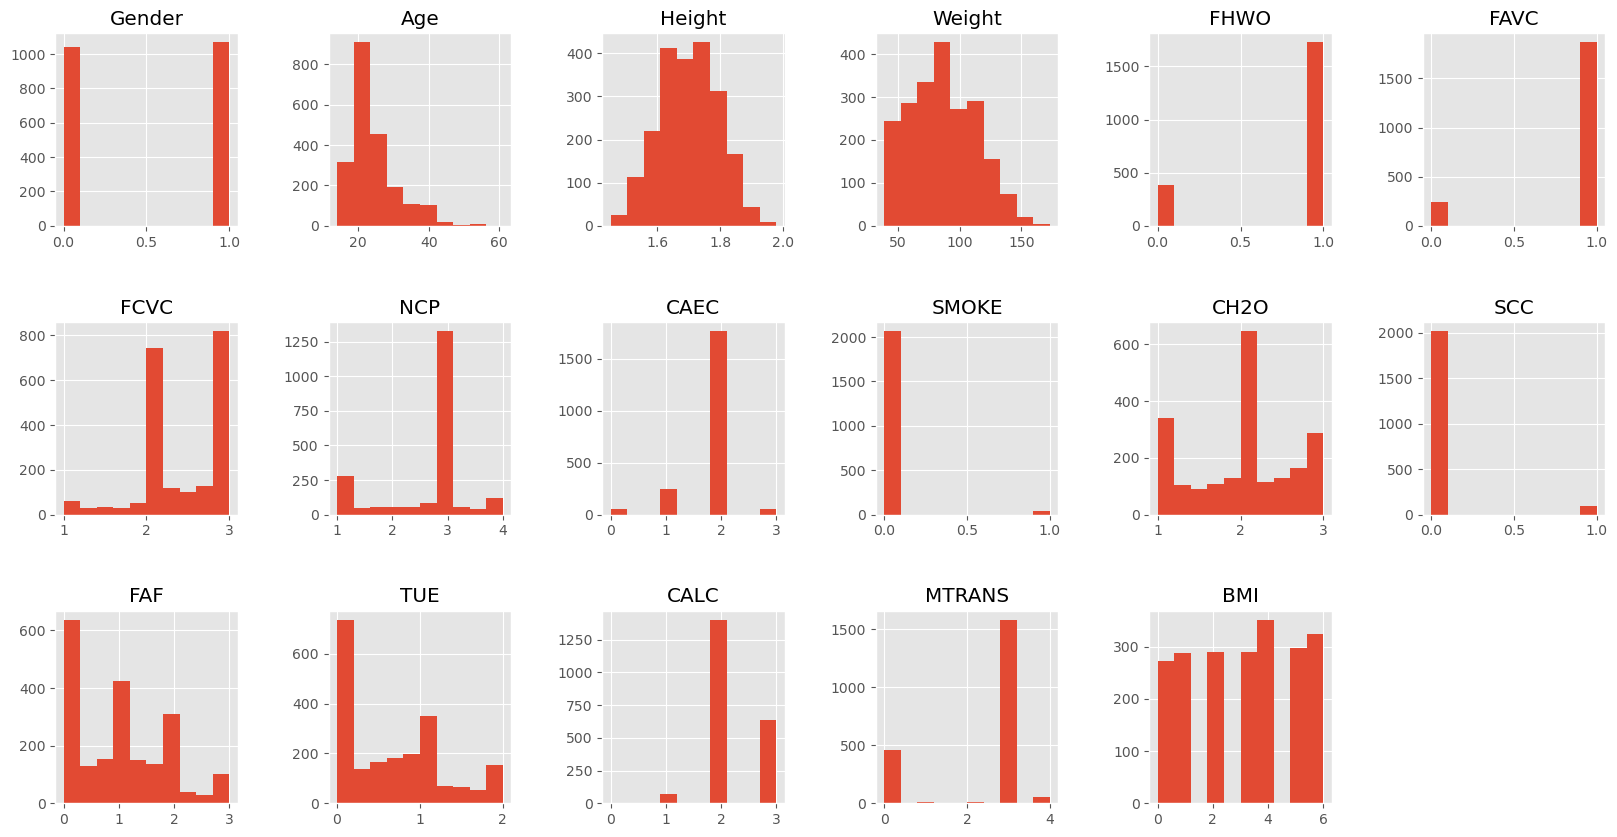

In [19]:
import math
import matplotlib.pyplot as plt

# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(data_transform.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(data_transform.iloc[:, i], bins=10)
        ax.set_title(data_transform.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

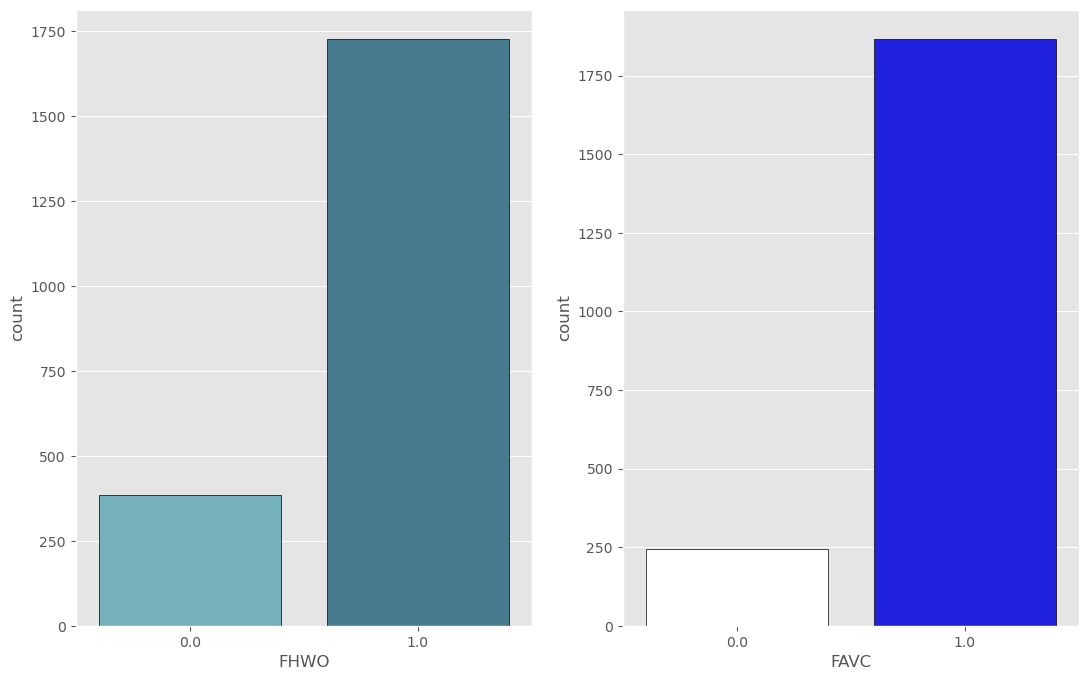

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = data_transform, palette="flag",edgecolor="black")
plt.savefig('count1.png', bbox_inches='tight',pad_inches=0)

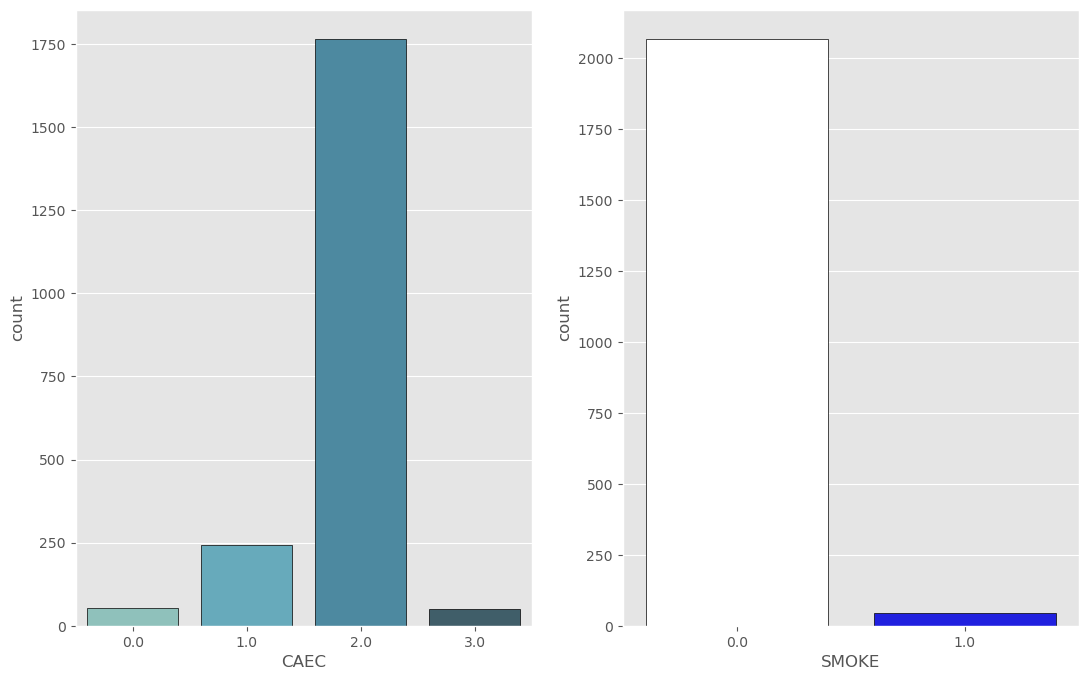

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = data_transform, palette="flag",edgecolor="black")
plt.savefig('count2.png', bbox_inches='tight',pad_inches=0)

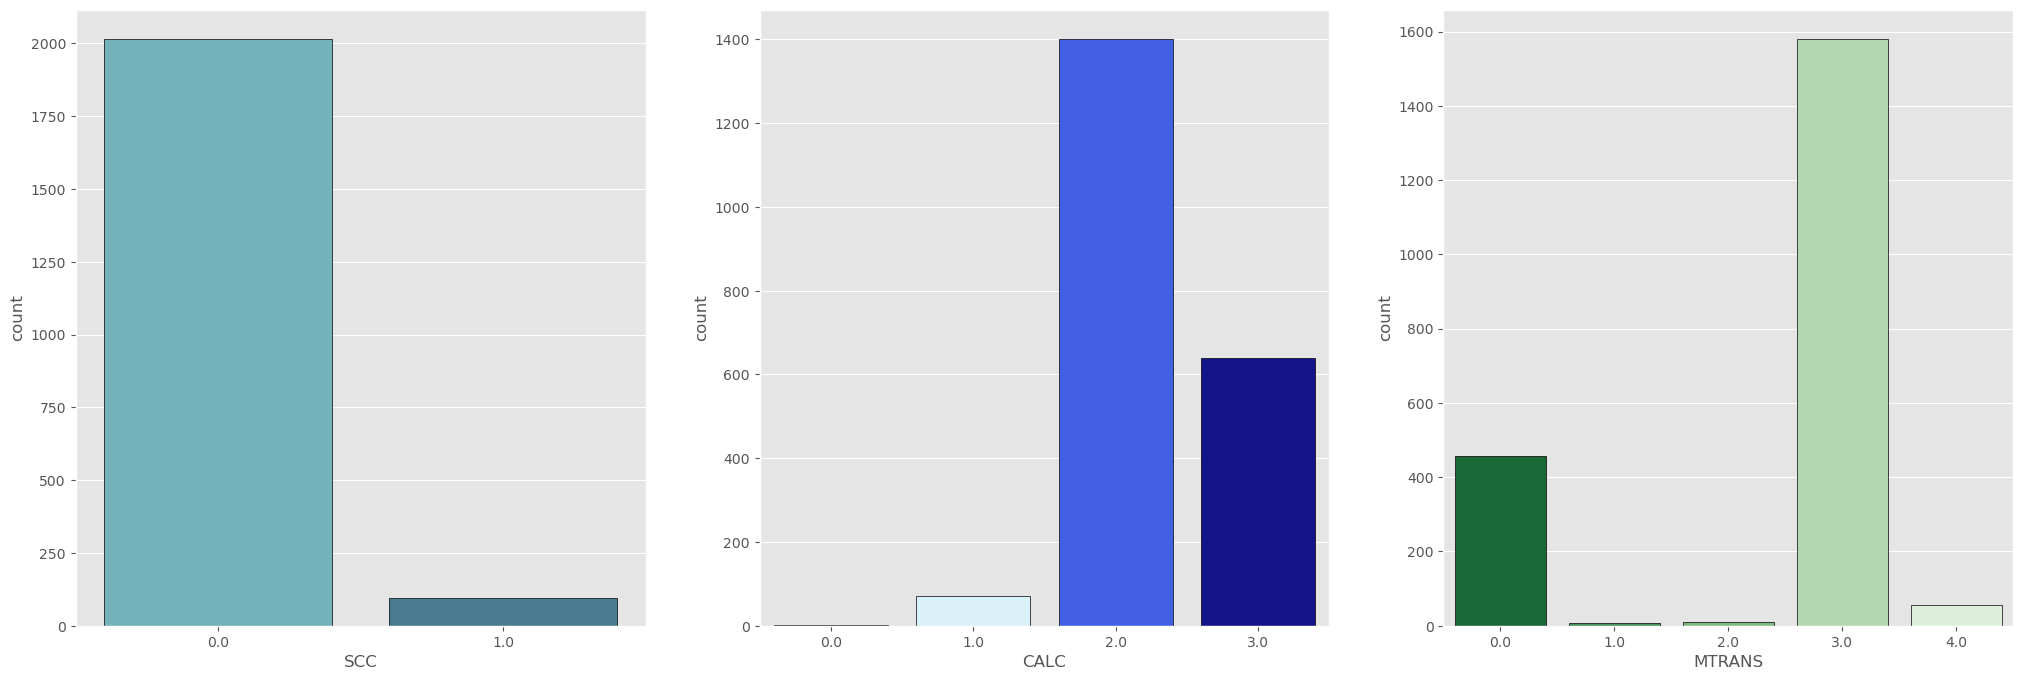

In [22]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.countplot(x= 'SCC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = data_transform, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = data_transform, palette="Greens_r",edgecolor="black")
plt.savefig('count3.png', bbox_inches='tight',pad_inches=0)

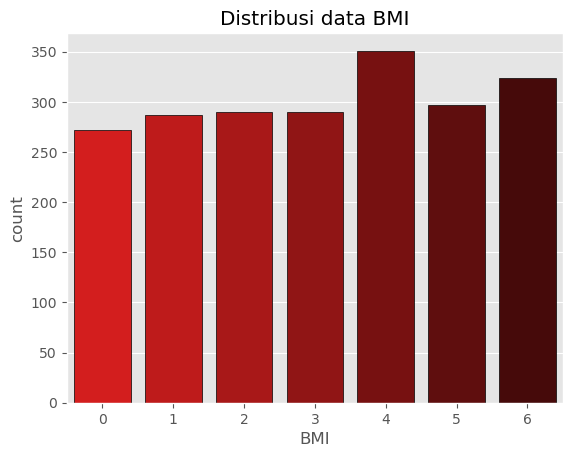

In [23]:
ax = sns.countplot(x = "BMI",data=data_transform, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
plt.savefig('Distribusi_hist.png')

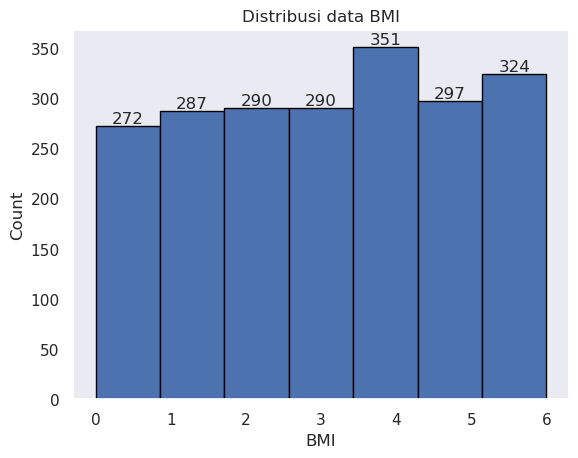

In [24]:
counts, edges, bars = plt.hist(data_transform['BMI'],edgecolor='black',bins=7)
plt.bar_label(bars)
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('Distribusi data BMI')
plt.grid()
plt.show()

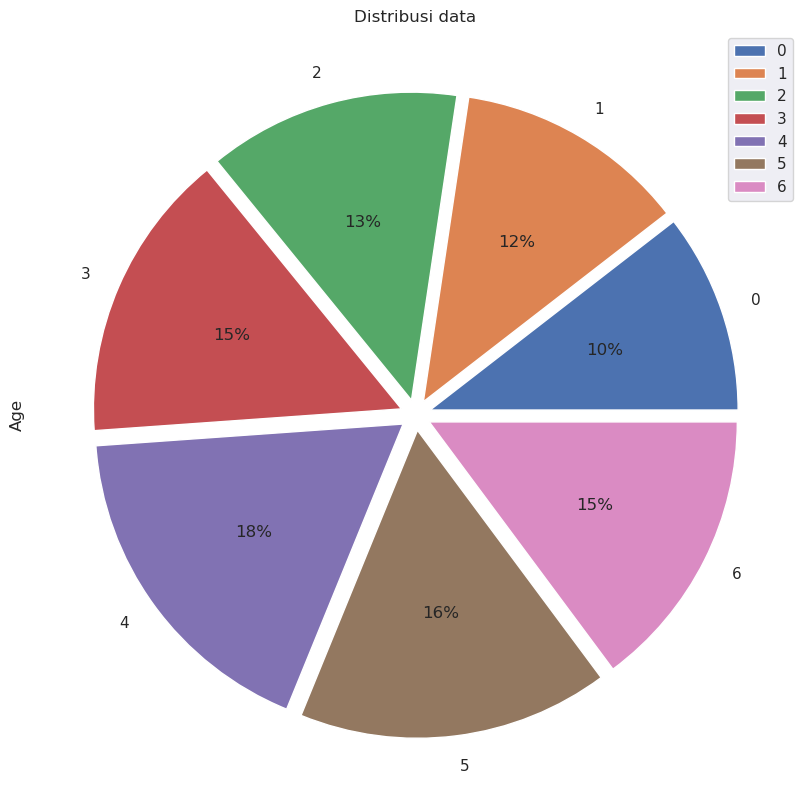

In [25]:
data_pie = data_transform.groupby(['BMI']).sum()
data_pie.plot(kind='pie', y='Age', 
              autopct='%1.0f%%', explode=[0.05]*7, 
              figsize=(10,10))
plt.legend(loc='upper right')
plt.title('Distribusi data')
plt.savefig('Distribusi_pie.png')

In [26]:
corr = data_transform.corr()

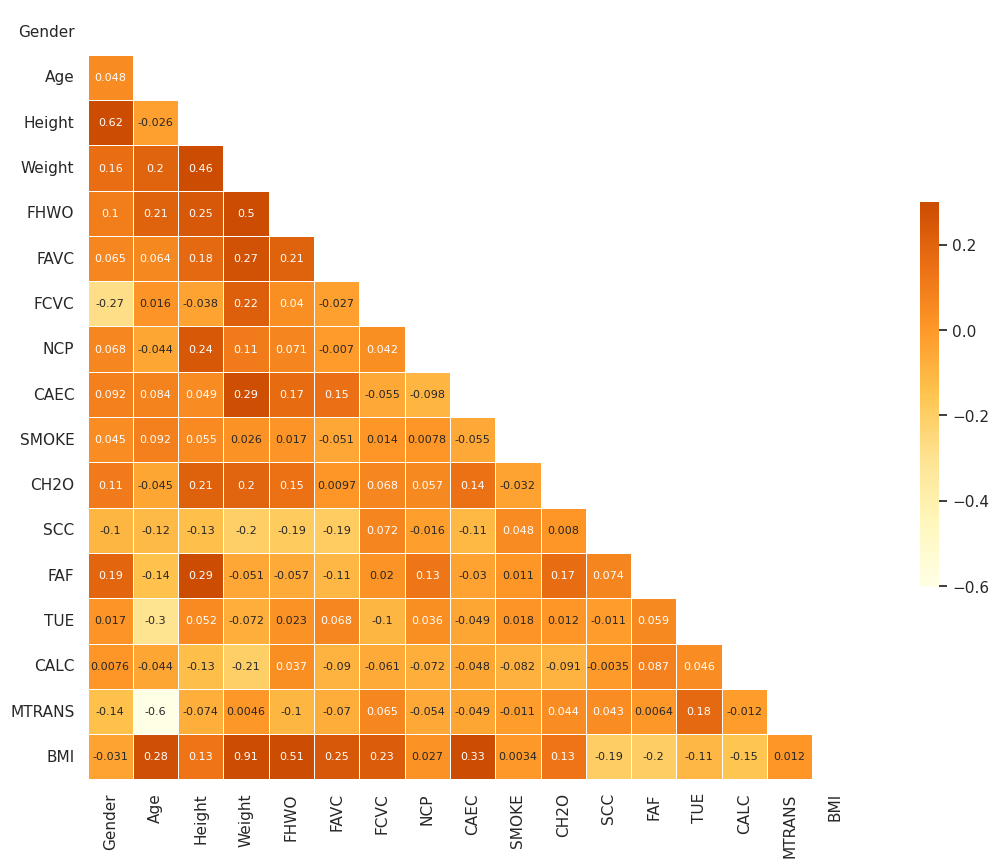

In [27]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

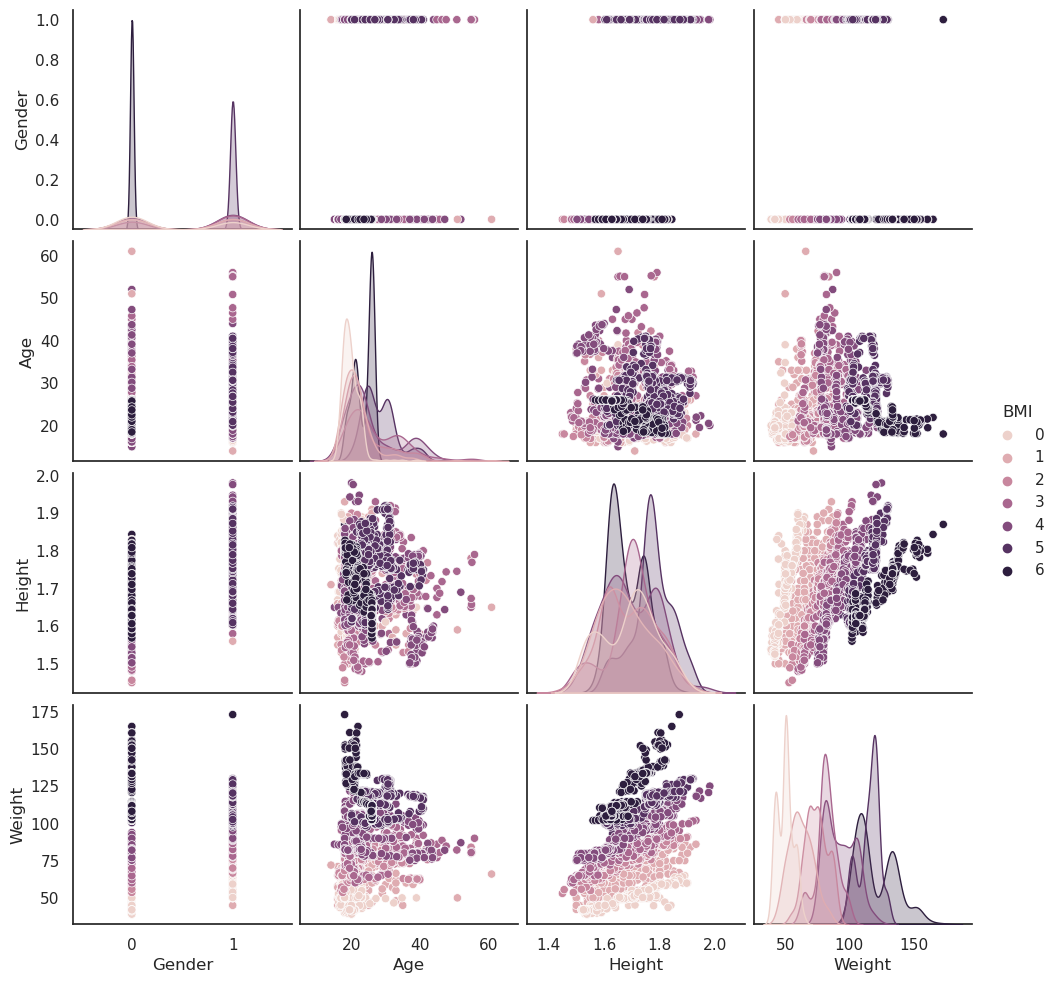

In [28]:
sns.pairplot(data_transform, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
plt.savefig('pairplot1.png')

# Train and Test split

In [29]:
data_input = data.copy()
data_input = data_input.drop(["Gender",'NCP','SMOKE','MTRANS'],axis=1)

In [ ]:
good_label_cols